In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Final Dataset - UK GHG.xlsx")
df

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,North East,Darlington,Darlington,E06000005,2005,62.036499,119.155609,0.044477,38.400224,219.636808,...,[x],[x],[x],5.210130,[x],[x],100.287,[x],197.4758,[x]
1,North East,Darlington,Darlington,E06000005,2006,66.262990,101.399615,0.064246,37.895255,205.622106,...,[x],[x],[x],5.993371,[x],[x],101.509,[x],197.4758,[x]
2,North East,Darlington,Darlington,E06000005,2007,62.523282,98.867838,0.072696,38.524724,199.988540,...,[x],[x],[x],6.261497,[x],[x],102.632,[x],197.4758,[x]
3,North East,Darlington,Darlington,E06000005,2008,61.789919,98.971476,0.054675,36.836290,197.652360,...,[x],[x],[x],6.187884,[x],[x],103.694,[x],197.4758,[x]
4,North East,Darlington,Darlington,E06000005,2009,54.544812,85.262146,1.150344,25.105354,166.062656,...,[x],[x],[x],5.494642,[x],[x],104.355,[x],197.4758,[x]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,National Total,National Total,National Total,NaN,2016,20720.108919,16077.306656,32823.601041,18378.160582,87999.177199,...,[x],[x],[x],4619.757020,[x],[x],65648.054,[x],248717.5706,[x]
6684,National Total,National Total,National Total,NaN,2017,18348.921829,15208.135257,33271.335457,18811.474865,85639.867408,...,[x],[x],[x],4882.859221,[x],[x],66040.229,[x],248717.5706,[x]
6685,National Total,National Total,National Total,NaN,2018,17002.290087,16216.382308,31968.153108,18512.889132,83699.714635,...,10301.701544,48364.320171,14207.129076,4755.242180,18962.371256,431459.098792,66435.550,6.494401,248717.5706,1.734735
6686,National Total,National Total,National Total,NaN,2019,14952.265313,14989.424434,31589.149813,16268.198366,77799.037926,...,10507.808146,48399.545528,14011.019219,4836.209169,18847.228388,416168.400707,66796.807,6.230364,248717.5706,1.673257


In [3]:
df.columns

Index(['Region/Country', 'Second Tier Authority', 'Local Authority',
       'Local Authority Code', 'Calendar Year', 'Industry Electricity',
       'Industry Gas ', 'Large Industrial Installations', 'Industry 'Other'',
       'Industry Total', 'Commercial Electricity', 'Commercial Gas ',
       'Commercial 'Other'', 'Commercial Total', 'Public Sector Electricity',
       'Public Sector Gas ', 'Public Sector 'Other'', 'Public Sector Total',
       'Domestic Electricity', 'Domestic Gas', 'Domestic 'Other'',
       'Domestic Total', 'Road Transport (A roads)',
       'Road Transport (Motorways)', 'Road Transport (Minor roads)',
       'Diesel Railways', 'Transport 'Other'', 'Transport Total',
       'Net Emissions: Forest land', 'Net Emissions: Cropland',
       'Net Emissions: Grassland', 'Net Emissions: Wetlands',
       'Net Emissions: Settlements', 'Net Emissions: Harvested Wood Products',
       'Net Emissions: Indirect N2O', 'LULUCF Net Emissions',
       'Agriculture Electricity', 

In [4]:
df_scotland=df[df["Region/Country"] == 'Scotland'].reset_index(drop=True)
df_scotland_2020=df_scotland[df_scotland["Calendar Year"] == 2020 ].reset_index(drop=True)
df_scotland=df_scotland[["Region/Country","Local Authority","Calendar Year","Local Authority Code","Population ('000s, mid-year estimate)",
                 "Per Capita Emissions (tCO2e)","Area (km2)","Emissions per km2 (kt CO2e)"]]
df_scotland

,Region/Country,Local Authority,Calendar Year,Local Authority Code,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,Scotland,Aberdeen City,2005,S12000033,208.69,[x],205.6013,[x]
1,Scotland,Aberdeen City,2006,S12000033,209.62,[x],205.6013,[x]
2,Scotland,Aberdeen City,2007,S12000033,212.46,[x],205.6013,[x]
3,Scotland,Aberdeen City,2008,S12000033,214.02,[x],205.6013,[x]
4,Scotland,Aberdeen City,2009,S12000033,217.02,[x],205.6013,[x]
...,...,...,...,...,...,...,...,...
507,Scotland,West Lothian,2016,S12000040,180.13,[x],431.5908,[x]
508,Scotland,West Lothian,2017,S12000040,181.31,[x],431.5908,[x]
509,Scotland,West Lothian,2018,S12000040,182.14,6.540492,431.5908,2.760219
510,Scotland,West Lothian,2019,S12000040,183.10,6.57209,431.5908,2.788173


In [5]:
df_scotland_2020

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,Scotland,Scotland,Aberdeen City,S12000033,2020,28.909707,26.999655,54.865194,77.815898,188.590454,...,5.105271,25.312676,17.682391,14.861443,32.543834,1096.716118,229.06,4.787899,205.6013,5.334189
1,Scotland,Scotland,Aberdeenshire,S12000034,2020,45.810558,31.313796,1.337897,85.658008,164.120259,...,258.421666,1066.515305,64.425069,19.039845,83.464913,2496.696109,260.78,9.573955,6338.1488,0.393916
2,Scotland,Scotland,Angus,S12000041,2020,20.679721,38.087454,4.264218,27.871843,90.903236,...,86.406804,259.934183,2.345974,8.035269,10.381243,829.410999,115.82,7.161207,2203.8928,0.376339
3,Scotland,Scotland,Argyll and Bute,S12000035,2020,10.493634,0.541381,12.623934,39.133543,62.792492,...,47.661998,283.771099,21.756713,5.867420,27.624133,762.59346,85.43,8.92653,7165.1715,0.106431
4,Scotland,Scotland,City of Edinburgh,S12000036,2020,43.231556,85.051505,0.423450,47.646217,176.352729,...,8.763094,28.979578,100.59142,23.137930,123.72935,2045.72063,527.62,3.877261,273.0043,7.493364
5,Scotland,Scotland,Clackmannanshire,S12000005,2020,31.689225,37.897313,144.783636,6.213555,220.583728,...,4.317897,20.272519,10.75442,2.167158,12.921579,509.200762,51.29,9.927876,163.9126,3.106538
6,Scotland,Scotland,Dumfries and Galloway,S12000006,2020,40.943971,58.807232,0.300589,44.750592,144.802385,...,219.0588,1542.625943,34.742064,10.359572,45.101636,2336.497244,148.29,15.75627,6676.3147,0.349968
7,Scotland,Scotland,Dundee City,S12000042,2020,12.052017,13.422063,0.499855,18.373962,44.347898,...,1.356294,2.952932,4.273036,7.393550,11.666586,621.520288,148.82,4.176322,62.2238,9.988466
8,Scotland,Scotland,East Ayrshire,S12000008,2020,14.899824,17.435646,0.604740,36.667345,69.607555,...,39.464055,294.648753,20.326496,9.817735,30.144231,784.532828,121.60,6.45175,1270.3421,0.617576
9,Scotland,Scotland,East Dunbartonshire,S12000045,2020,5.840783,3.630453,0.000000,11.149179,20.620415,...,3.871467,23.617021,13.222536,12.620479,25.843015,410.044055,108.75,3.77052,174.4890,2.349971


In [6]:
gdf = gpd.read_file('/Users/user/Desktop/GHG - UK /Local_Authority_Districts_May_2022_UK_BFE_V3_2022_3331011932393166417/LAD_MAY_2022_UK_BFE_V3.shp')

In [7]:
gdf

,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,447160,531474,-1.27018,54.6761,2efc9848-300e-4ef3-a36e-58d6856b9817,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,451141,516887,-1.21099,54.5447,6d66b015-1f67-40f6-b239-15911fa03834,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.5675,a5a6513f-916e-4769-bed2-cd019d18719a,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.5569,14e8450b-7e7c-479a-a335-095ac2d9a701,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,428029,515648,-1.56835,54.5353,2f212ecf-daf5-4171-b9c6-825c0d33e5af,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...
369,W06000020,Torfaen,327459,200480,-3.05101,51.6984,a9bfd875-581d-4b13-a88c-0be157037504,"POLYGON ((323898.201 211287.499, 324115.698 21..."
370,W06000021,Monmouthshire,337812,209231,-2.90280,51.7783,856d4586-ee01-46c6-8030-155676e72ec8,"MULTIPOLYGON (((345965.201 181030.700, 345944...."
371,W06000022,Newport,337897,187432,-2.89769,51.5823,9ded1cac-b393-4732-a068-4fbe1e8881cc,"POLYGON ((342211.900 194845.495, 342221.803 19..."
372,W06000023,Powys,302329,273255,-3.43531,52.3486,82c92ce3-674b-41dc-8702-31072fa0fc10,"POLYGON ((322392.901 334017.198, 322378.002 33..."


In [8]:
gdf=gdf.rename(columns={"LAD22CD":"Local Authority Code"})

In [9]:
merged_df = df_scotland_2020.merge(gdf, on='Local Authority Code')

In [10]:
merged_df

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e),LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,Scotland,Scotland,Aberdeen City,S12000033,2020,28.909707,26.999655,54.865194,77.815898,188.590454,...,4.787899,205.6013,5.334189,Aberdeen City,387763,808479,-2.20398,57.1670,2d2da68f-ad23-4538-9770-7af143a96979,"MULTIPOLYGON (((395326.897 800228.397, 395315...."
1,Scotland,Scotland,Aberdeenshire,S12000034,2020,45.810558,31.313796,1.337897,85.658008,164.120259,...,9.573955,6338.1488,0.393916,Aberdeenshire,352284,816277,-2.79208,57.2347,58f8f7c2-31d9-4e1a-87e9-5b3d739fee8c,"MULTIPOLYGON (((383521.198 771234.696, 383524...."
2,Scotland,Scotland,Angus,S12000041,2020,20.679721,38.087454,4.264218,27.871843,90.903236,...,7.161207,2203.8928,0.376339,Angus,345506,759636,-2.89210,56.7252,e43ad2a7-f962-4611-8696-a0f7ea8e42ed,"POLYGON ((346942.001 788024.500, 347121.001 78..."
3,Scotland,Scotland,Argyll and Bute,S12000035,2020,10.493634,0.541381,12.623934,39.133543,62.792492,...,8.92653,7165.1715,0.106431,Argyll and Bute,200740,715443,-5.22114,56.2894,4c96b3fc-5f24-4c64-9c4c-e3ea43ea80a9,"MULTIPOLYGON (((173254.001 604986.004, 173258...."
4,Scotland,Scotland,City of Edinburgh,S12000036,2020,43.231556,85.051505,0.423450,47.646217,176.352729,...,3.877261,273.0043,7.493364,City of Edinburgh,320193,669417,-3.27826,55.9112,578484a8-869f-42bd-84db-c7e0c0bf50f6,"MULTIPOLYGON (((313586.104 679560.597, 313614...."
5,Scotland,Scotland,Clackmannanshire,S12000005,2020,31.689225,37.897313,144.783636,6.213555,220.583728,...,9.927876,163.9126,3.106538,Clackmannanshire,291178,696402,-3.75316,56.1478,f49f06b4-a547-44c3-995d-6ce6cd5d2dd7,"POLYGON ((290674.497 703671.496, 290731.000 70..."
6,Scotland,Scotland,Dumfries and Galloway,S12000006,2020,40.943971,58.807232,0.300589,44.750592,144.802385,...,15.75627,6676.3147,0.349968,Dumfries and Galloway,270645,579856,-4.02863,55.0962,15ff2cbd-ab66-4325-81ab-5481864190ef,"MULTIPOLYGON (((266004.400 543544.601, 266010...."
7,Scotland,Scotland,Dundee City,S12000042,2020,12.052017,13.422063,0.499855,18.373962,44.347898,...,4.176322,62.2238,9.988466,Dundee City,340291,732145,-2.97095,56.4776,2106c263-ff0a-41cf-bf71-b22bcd771563,"POLYGON ((342039.900 734680.100, 342041.401 73..."
8,Scotland,Scotland,East Ayrshire,S12000008,2020,14.899824,17.435646,0.604740,36.667345,69.607555,...,6.45175,1270.3421,0.617576,East Ayrshire,255398,624935,-4.29057,55.4967,da061def-bc4b-4bab-b2ba-e4e78c409f68,"POLYGON ((243071.200 655079.705, 243096.298 65..."
9,Scotland,Scotland,East Dunbartonshire,S12000045,2020,5.840783,3.630453,0.000000,11.149179,20.620415,...,3.77052,174.4890,2.349971,East Dunbartonshire,261240,676154,-4.22417,55.9583,38b4a9d2-8561-451e-bc0d-357999add3e9,"POLYGON ((258374.503 683849.000, 258376.498 68..."


In [11]:
merged_df.dtypes

Region/Country                              object
Second Tier Authority                       object
Local Authority                             object
Local Authority Code                        object
Calendar Year                                int64
Industry Electricity                       float64
Industry Gas                               float64
Large Industrial Installations             float64
Industry 'Other'                           float64
Industry Total                             float64
Commercial Electricity                     float64
Commercial Gas                             float64
Commercial 'Other'                         float64
Commercial Total                           float64
Public Sector Electricity                  float64
Public Sector Gas                          float64
Public Sector 'Other'                      float64
Public Sector Total                        float64
Domestic Electricity                       float64
Domestic Gas                   

In [12]:
merged_df["Emissions per km2 (kt CO2e)"]= merged_df["Emissions per km2 (kt CO2e)"].astype(float)

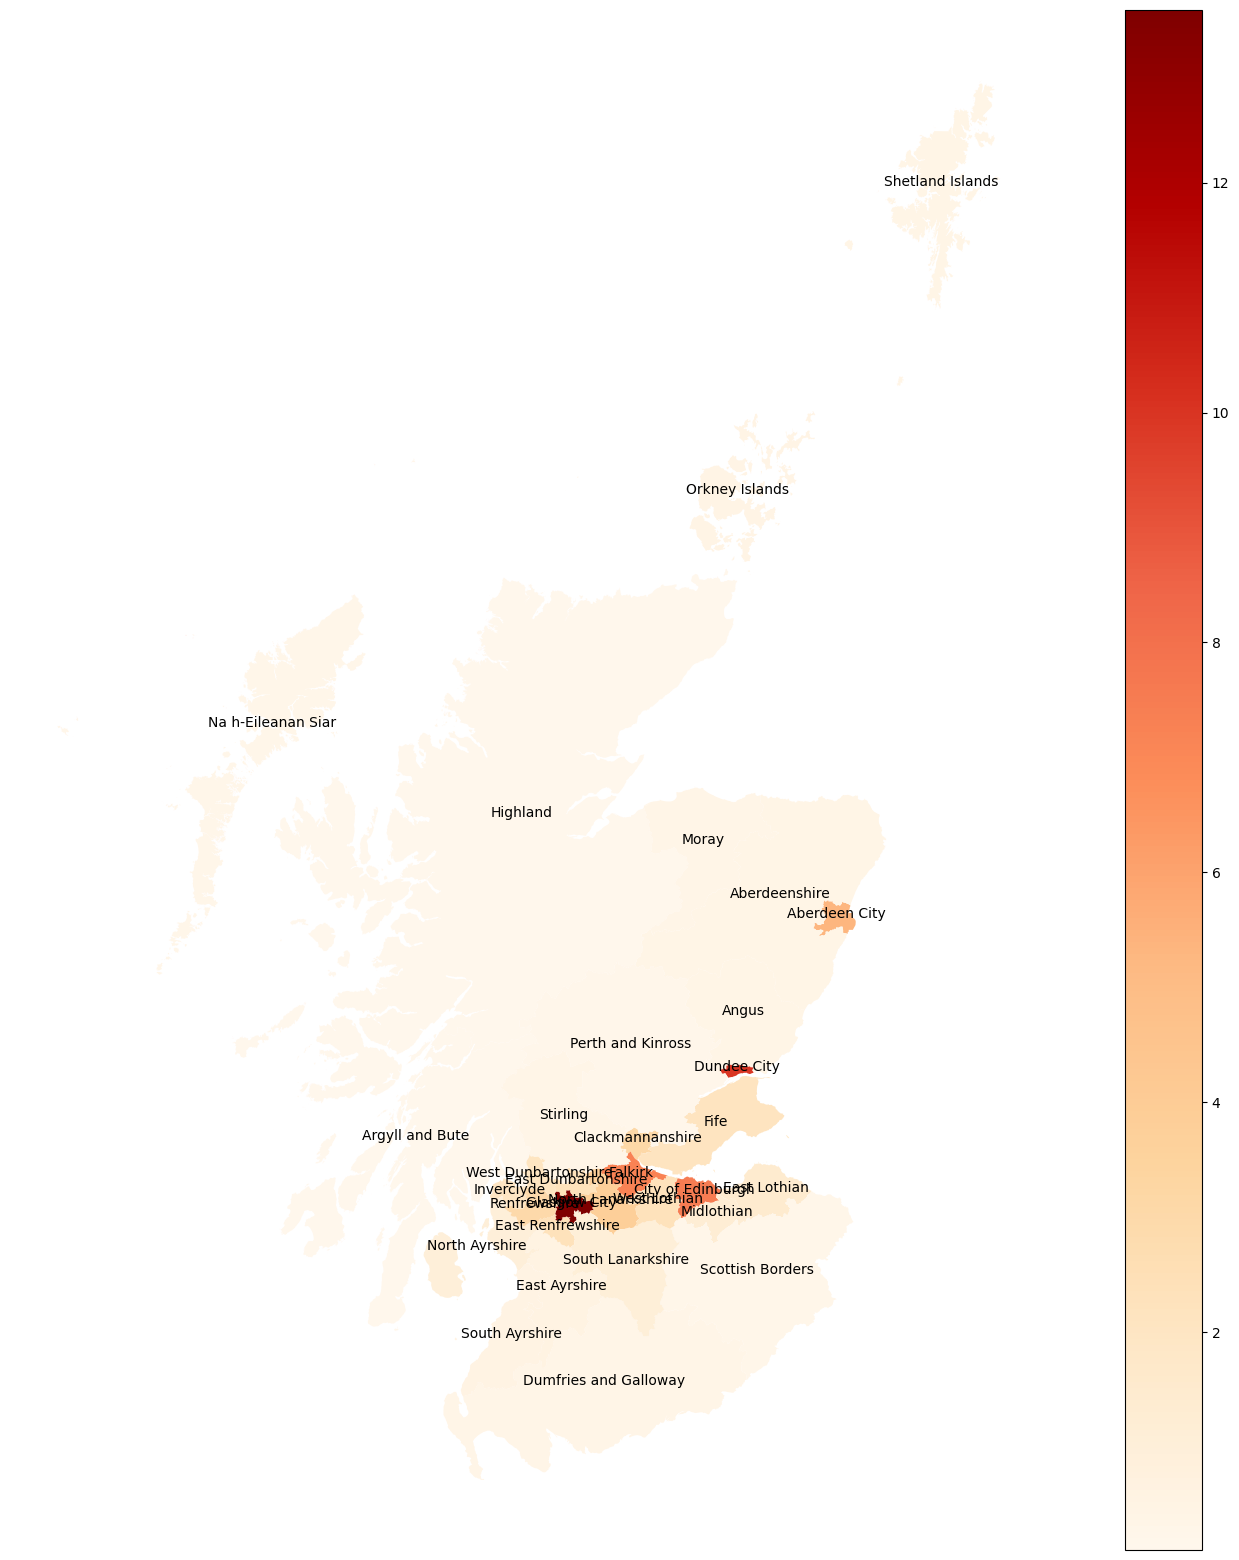

In [13]:
plt.rcParams['figure.figsize'] = (20,20)
# Convert the merged DataFrame back into geodataframe
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')
ax = merged_gdf.plot(column="Emissions per km2 (kt CO2e)", cmap='OrRd', legend=True)
merged_gdf.apply(lambda x: ax.annotate(text=x['Local Authority'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
#merged_gdf.plot(column="Emissions per km2 (kt CO2e)", cmap='OrRd', legend=False)
plt.xlabel("Districts in Scotland")
plt.ylabel("Kilotonne CO2 Emission")
#legend.set_title("CO2 Emission(Kt/Km2)")
plt.savefig("Airpollution.pdf")
plt.axis('off')
plt.show();

In [14]:
merged_gdf=merged_gdf[['Local Authority','Area (km2)','Emissions per km2 (kt CO2e)','geometry']]
merged_gdf.to_csv("Final_Data.csv",index=False)
merged_gdf.head(5)

,Local Authority,Area (km2),Emissions per km2 (kt CO2e),geometry
0,Aberdeen City,205.6013,5.334189,"MULTIPOLYGON (((395326.897 800228.397, 395315...."
1,Aberdeenshire,6338.1488,0.393916,"MULTIPOLYGON (((383521.198 771234.696, 383524...."
2,Angus,2203.8928,0.376339,"POLYGON ((346942.001 788024.500, 347121.001 78..."
3,Argyll and Bute,7165.1715,0.106431,"MULTIPOLYGON (((173254.001 604986.004, 173258...."
4,City of Edinburgh,273.0043,7.493364,"MULTIPOLYGON (((313586.104 679560.597, 313614...."


In [15]:
df_scotland["Per Capita Emissions (tCO2e)"]=df_scotland["Per Capita Emissions (tCO2e)"].replace("[x]",0)
df_scotland["Emissions per km2 (kt CO2e)"]=df_scotland["Emissions per km2 (kt CO2e)"].replace("[x]",0)

In [16]:
df_scotland

,Region/Country,Local Authority,Calendar Year,Local Authority Code,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,Scotland,Aberdeen City,2005,S12000033,208.69,0.000000,205.6013,0.000000
1,Scotland,Aberdeen City,2006,S12000033,209.62,0.000000,205.6013,0.000000
2,Scotland,Aberdeen City,2007,S12000033,212.46,0.000000,205.6013,0.000000
3,Scotland,Aberdeen City,2008,S12000033,214.02,0.000000,205.6013,0.000000
4,Scotland,Aberdeen City,2009,S12000033,217.02,0.000000,205.6013,0.000000
...,...,...,...,...,...,...,...,...
507,Scotland,West Lothian,2016,S12000040,180.13,0.000000,431.5908,0.000000
508,Scotland,West Lothian,2017,S12000040,181.31,0.000000,431.5908,0.000000
509,Scotland,West Lothian,2018,S12000040,182.14,6.540492,431.5908,2.760219
510,Scotland,West Lothian,2019,S12000040,183.10,6.572090,431.5908,2.788173


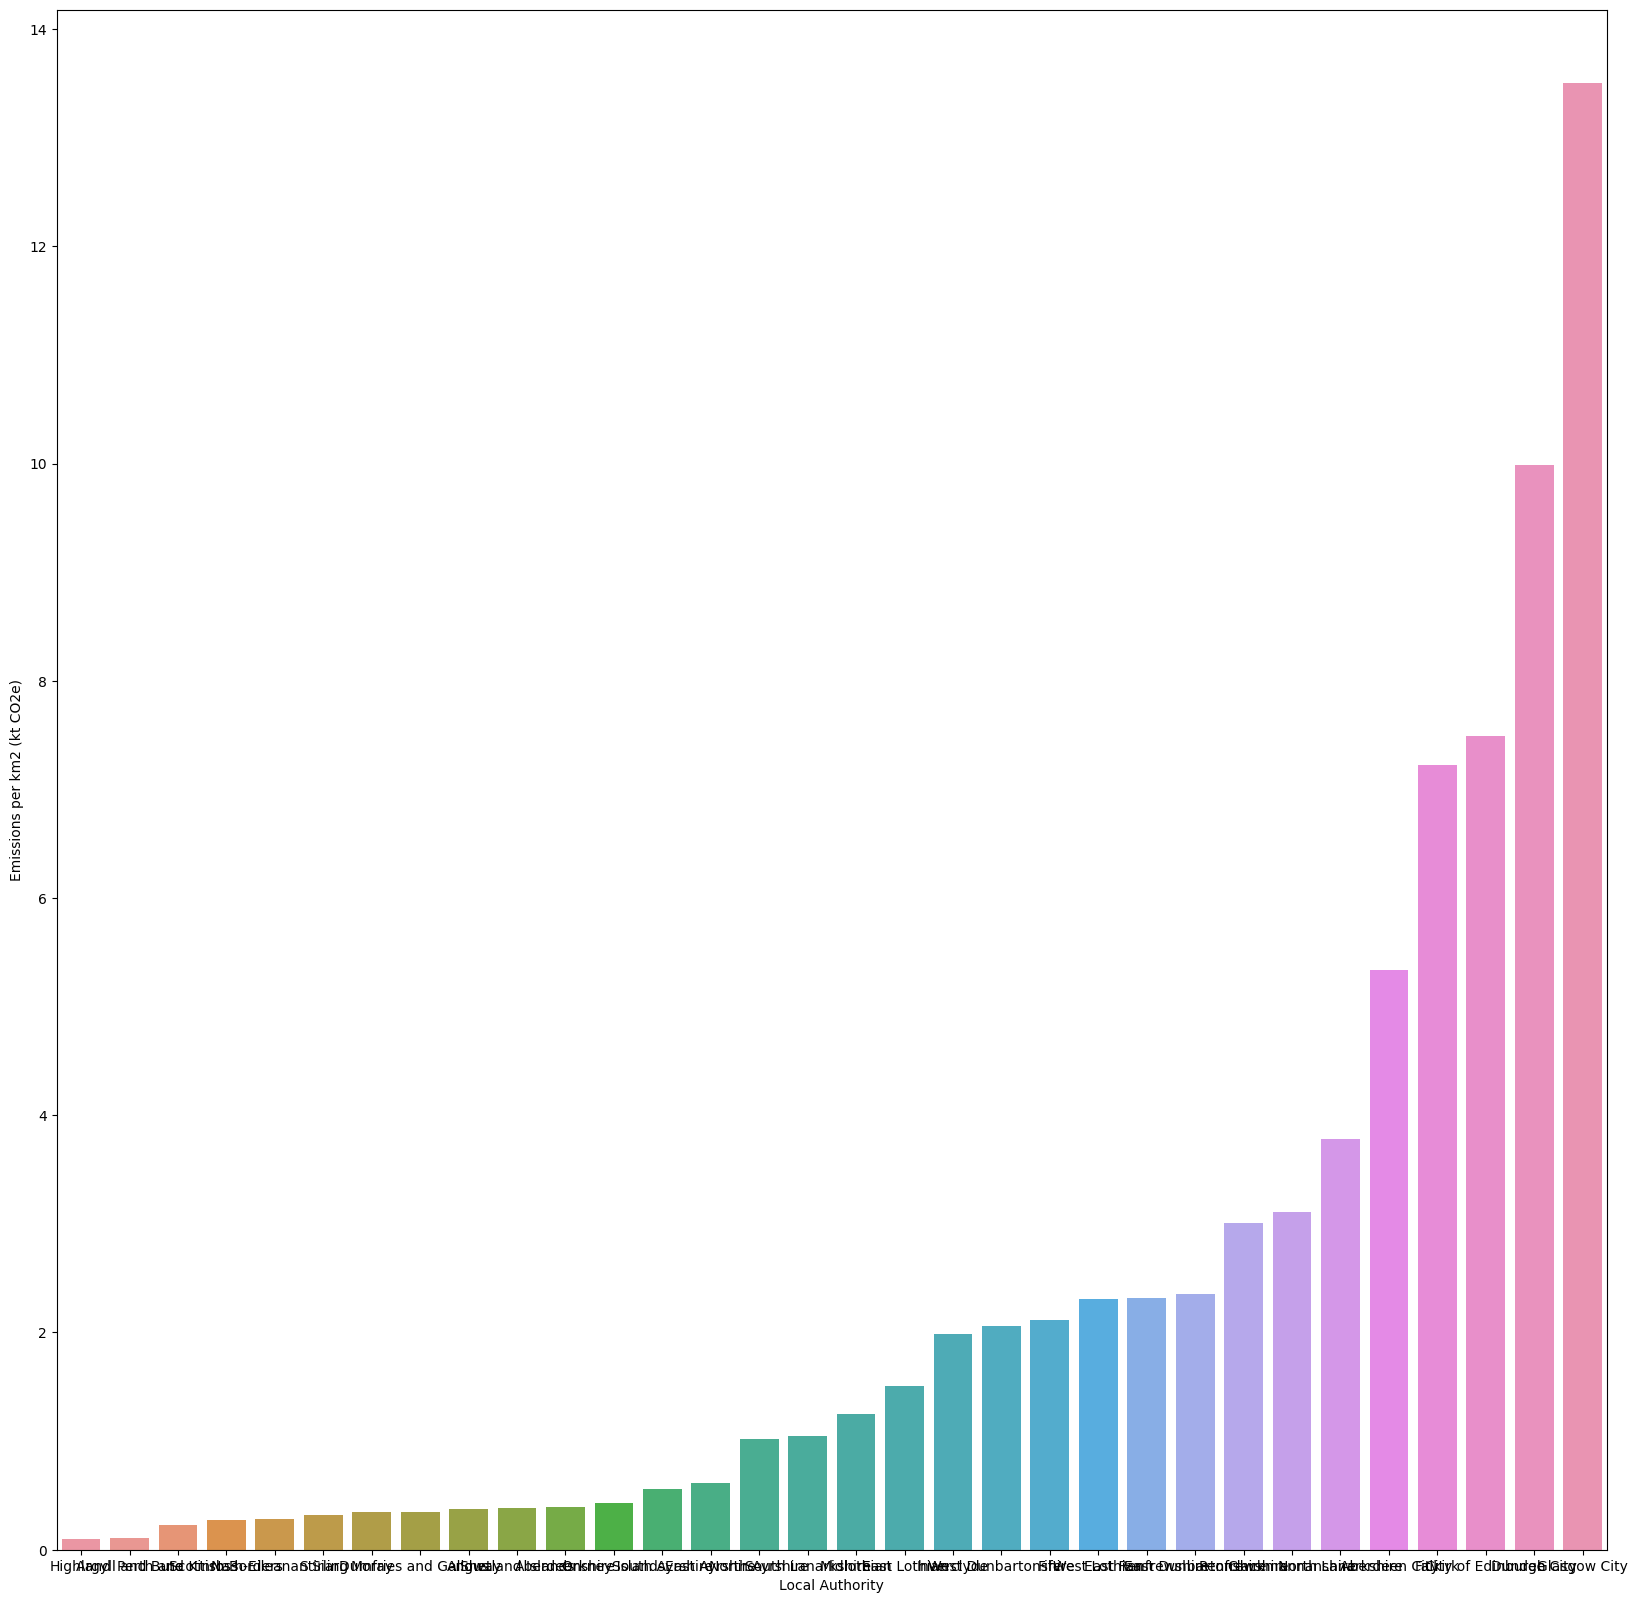

In [17]:
import seaborn as sns
ordered_data=merged_gdf.sort_values("Emissions per km2 (kt CO2e)")
sns.barplot(data=ordered_data,x="Local Authority",y="Emissions per km2 (kt CO2e)");

In [18]:
import numpy as np
np.quantile(merged_gdf["Emissions per km2 (kt CO2e)"],0.800)

3.0868171706236067

In [19]:
# first cut off 2.3
# second cut off 6.5
# outliers

In [20]:
for index, value in enumerate(merged_gdf["Emissions per km2 (kt CO2e)"]):
    if value <= 3.0:
        merged_gdf.at[index, "Grouping"] = "Lowest"
    elif value > 3.0 and value <= 7.0:
        merged_gdf.at[index, "Grouping"] = "Moderate"
    else:
        merged_gdf.at[index, "Grouping"] = "Highest"
dff=merged_gdf

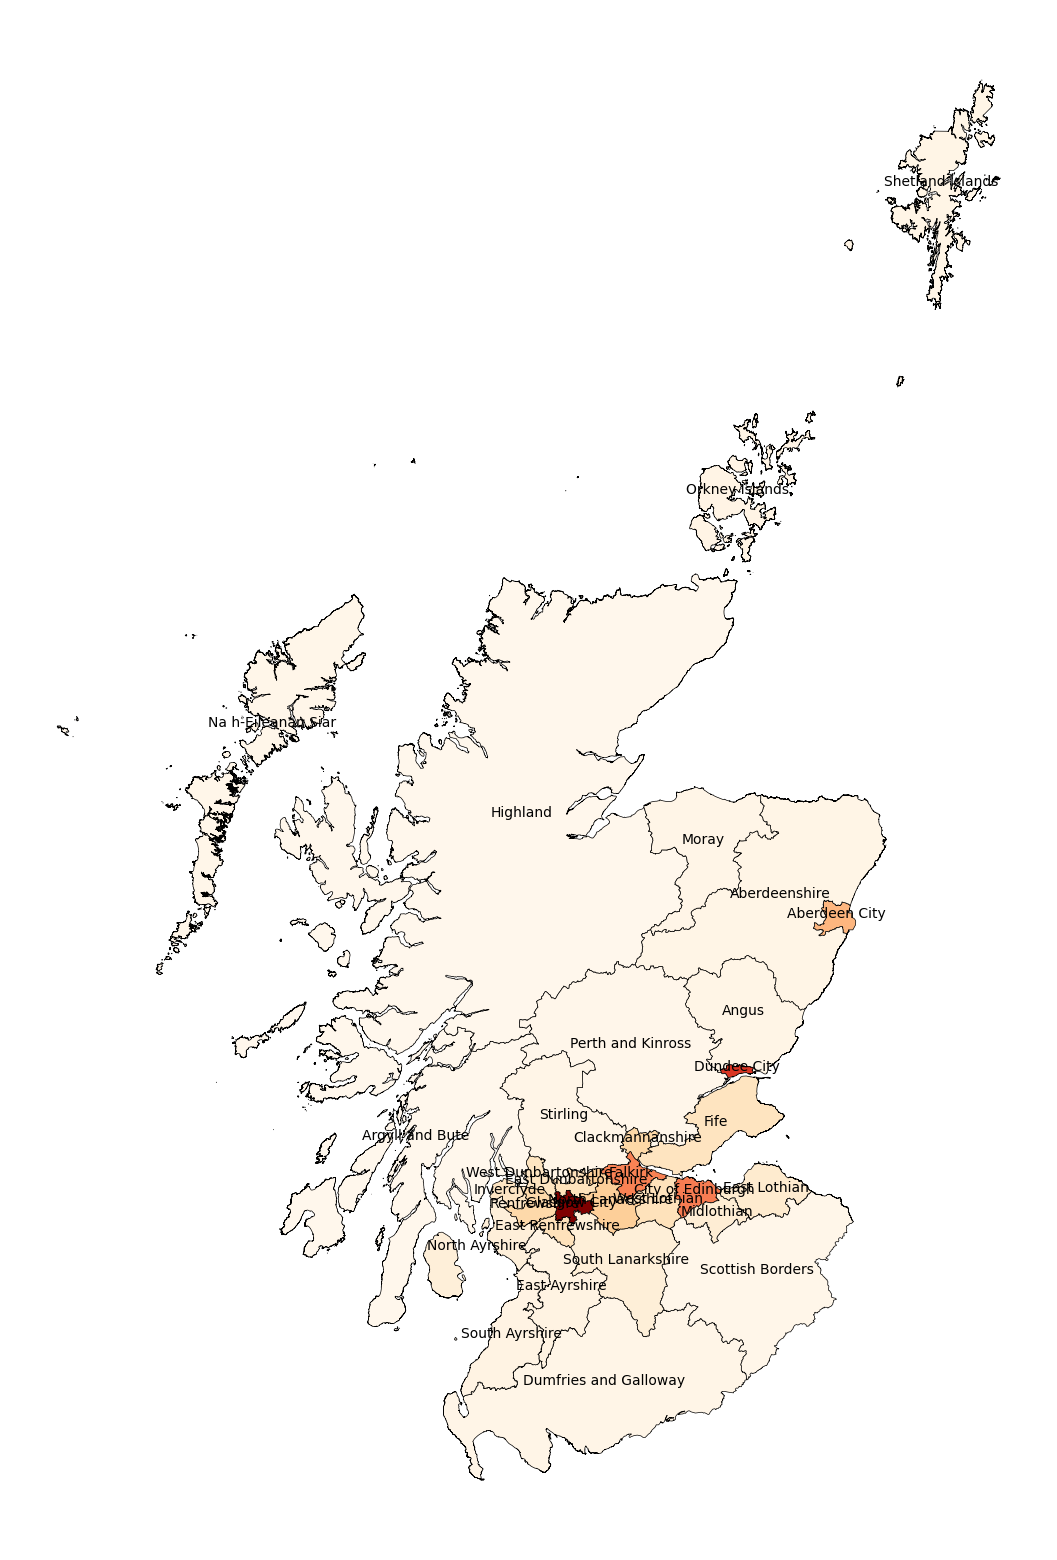

In [21]:
plt.rcParams['figure.figsize'] = (20,20)
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')
ax = merged_gdf.plot(column="Emissions per km2 (kt CO2e)", cmap='OrRd', legend=False,edgecolor='black', linewidth=0.5)
merged_gdf.apply(lambda x: ax.annotate(text=x['Local Authority'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
#merged_gdf.plot(column="Emissions per km2 (kt CO2e)", cmap='OrRd', legend=False)
plt.axis('off')
plt.savefig("Airpollution.png")
plt.show();

In [22]:
merged_gdf=dff

In [23]:
merged_gdf

,Local Authority,Area (km2),Emissions per km2 (kt CO2e),geometry,Grouping
0,Aberdeen City,205.6013,5.334189,"MULTIPOLYGON (((395326.897 800228.397, 395315....",Moderate
1,Aberdeenshire,6338.1488,0.393916,"MULTIPOLYGON (((383521.198 771234.696, 383524....",Lowest
2,Angus,2203.8928,0.376339,"POLYGON ((346942.001 788024.500, 347121.001 78...",Lowest
3,Argyll and Bute,7165.1715,0.106431,"MULTIPOLYGON (((173254.001 604986.004, 173258....",Lowest
4,City of Edinburgh,273.0043,7.493364,"MULTIPOLYGON (((313586.104 679560.597, 313614....",Highest
5,Clackmannanshire,163.9126,3.106538,"POLYGON ((290674.497 703671.496, 290731.000 70...",Moderate
6,Dumfries and Galloway,6676.3147,0.349968,"MULTIPOLYGON (((266004.400 543544.601, 266010....",Lowest
7,Dundee City,62.2238,9.988466,"POLYGON ((342039.900 734680.100, 342041.401 73...",Highest
8,East Ayrshire,1270.3421,0.617576,"POLYGON ((243071.200 655079.705, 243096.298 65...",Lowest
9,East Dunbartonshire,174.4890,2.349971,"POLYGON ((258374.503 683849.000, 258376.498 68...",Lowest


In [24]:
list(merged_gdf["Grouping"].unique())

['Moderate', 'Lowest', 'Highest']

Aberdeen City
5.3341886348589975


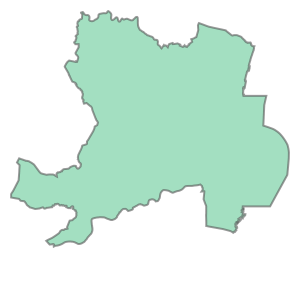

In [25]:
print(merged_gdf["Local Authority"][0])
print(merged_gdf["Emissions per km2 (kt CO2e)"][0])
merged_gdf["geometry"][0]

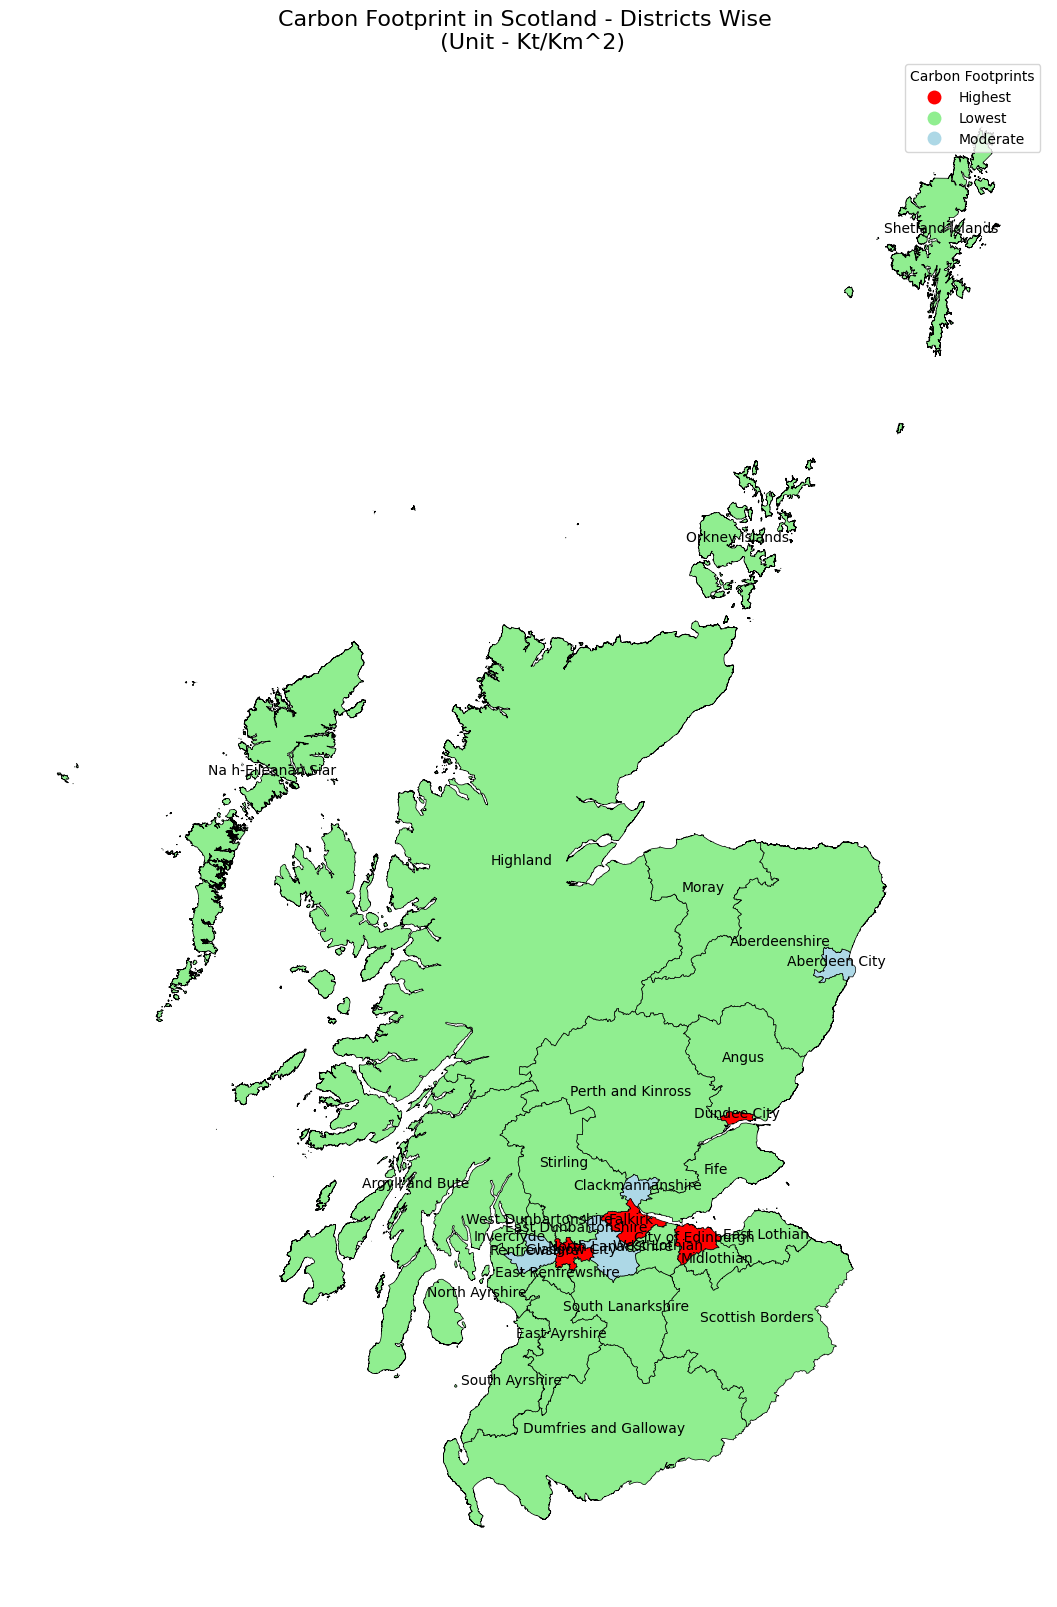

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
from matplotlib.colors import ListedColormap
categories = list(merged_gdf["Grouping"].unique())
colors = ["red", "lightgreen", "lightblue"][:len(categories)]

cmap = ListedColormap(colors)

ax = merged_gdf.plot(column="Grouping", cmap=cmap, legend=True,edgecolor='black', linewidth=0.5)

merged_gdf.apply(lambda x: ax.annotate(text=x['Local Authority'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

legend = ax.get_legend()
legend.set_title("Carbon Footprints")
plt.title("Carbon Footprint in Scotland - Districts Wise \n (Unit - Kt/Km^2)",fontsize=16)
plt.ticklabel_format(style='plain', axis='y') 
plt.axis('off')
plt.savefig("Airpollution1.png")
plt.show();


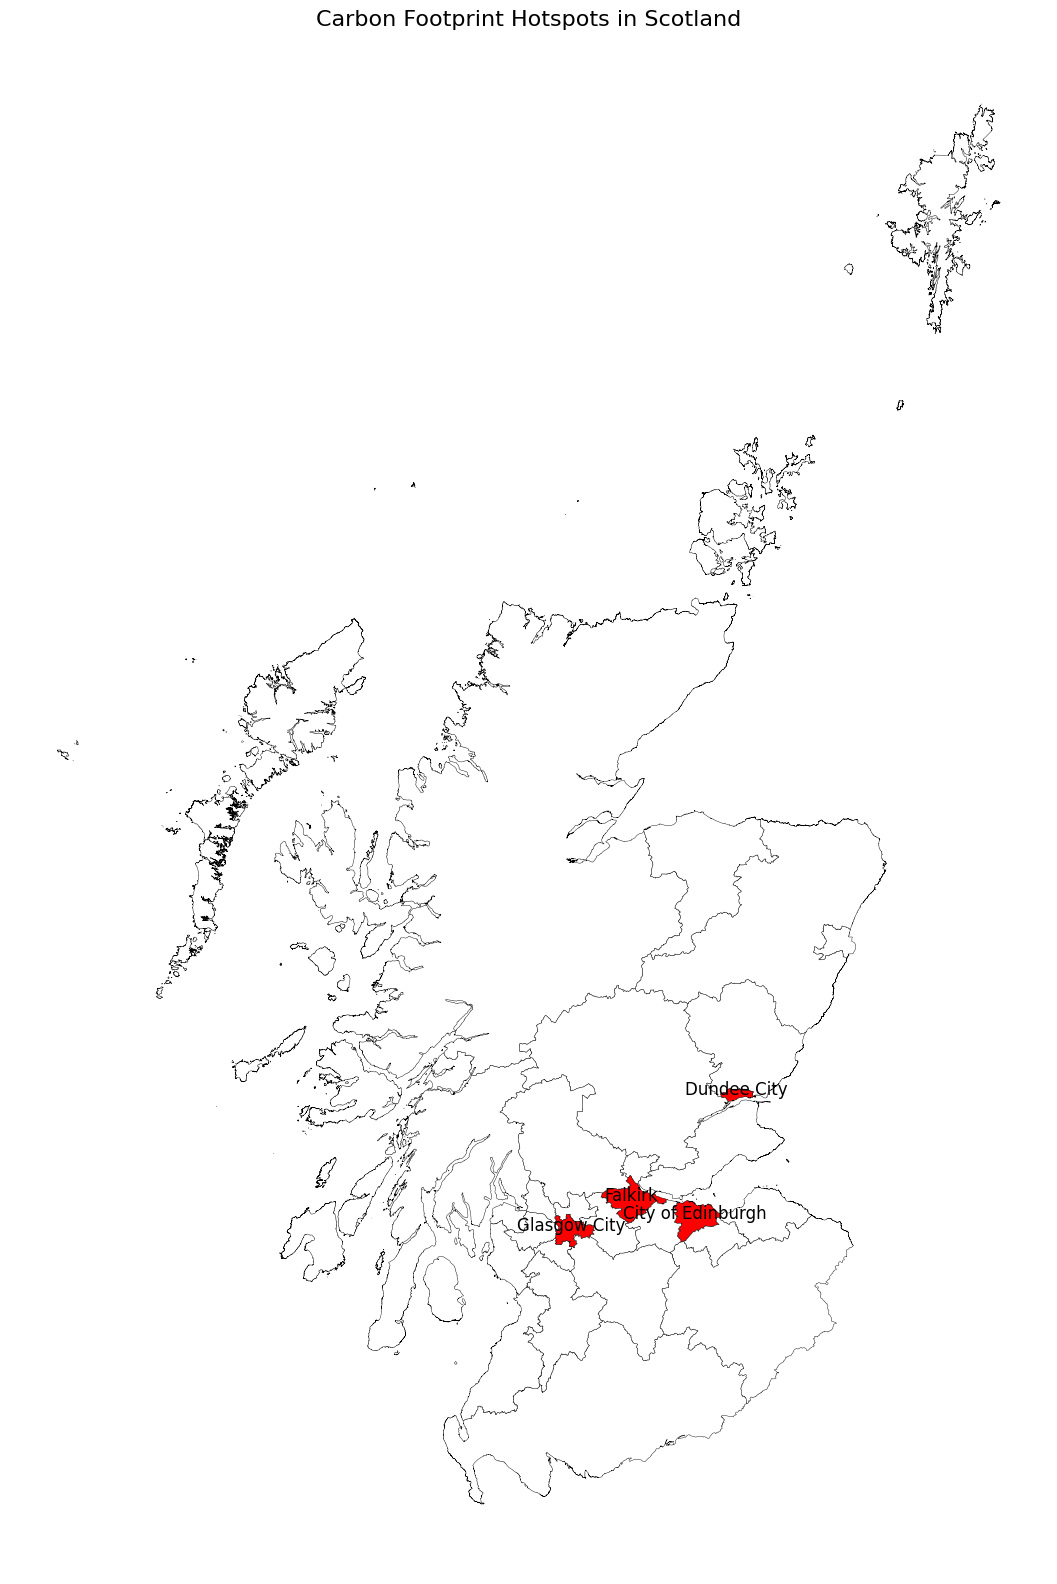

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
from matplotlib.colors import ListedColormap

categories = list(merged_gdf["Grouping"].unique())
colors = ["red", "white", "white"][:len(categories)]

cmap = ListedColormap(colors)

ax = merged_gdf.plot(column="Grouping", cmap=cmap, legend=False, edgecolor='black', linewidth=0.3)

highest_gdf = merged_gdf[merged_gdf["Grouping"] == "Highest"]
highest_gdf.apply(lambda x: ax.annotate(text=x['Local Authority'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=12), axis=1)

#legend = ax.get_legend()
#legend.set_title("Carbon Footprints")
plt.title("Carbon Footprint Hotspots in Scotland", fontsize=16)
plt.ticklabel_format(style='plain', axis='y')
plt.axis('off')
plt.savefig("Airpollution2.png")
plt.show()


In [28]:
list(merged_gdf["Grouping"].unique())

['Moderate', 'Lowest', 'Highest']

In [29]:
merged_gdf[merged_gdf["Grouping"] == "Highest"]["Emissions per km2 (kt CO2e)"].sum()

38.20890061414334

In [30]:
merged_gdf["Emissions per km2 (kt CO2e)"].sum()

76.17228302684146

In [31]:
merged_gdf[merged_gdf["Grouping"] == "Highest"]["Emissions per km2 (kt CO2e)"].sum()/merged_gdf["Emissions per km2 (kt CO2e)"].sum()

0.5016115980228576

In [32]:
merged_gdf[merged_gdf["Grouping"] == "Moderate"]["Emissions per km2 (kt CO2e)"].sum()/merged_gdf["Emissions per km2 (kt CO2e)"].sum()

0.19988638968599984

In [33]:
merged_gdf[merged_gdf["Grouping"] == "Lowest"]["Emissions per km2 (kt CO2e)"].sum()/merged_gdf["Emissions per km2 (kt CO2e)"].sum()

0.29850201229114254